In [1]:
import sys
sys.path.append('audio_preproc')
import audio_preproc.fbtools
import audio_preproc.spectools
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Assign values to reading wavfiles for each stimulus

[fs1, w1] = wavfile.read('/Users/maansidesai/Desktop/UT_Austin/Research/Fellowships/NDSEG/Figure/speech.wav')
[fs2, w2] = wavfile.read('/Users/maansidesai/Desktop/UT_Austin/Research/Fellowships/NDSEG/Figure/music.wav')
#[fs3, w3] = wavfile.read('/Users/maansidesai/Desktop/UT_Austin/Research/Fellowships/NDSEG/Figure/background_noise.wav')

w1 = w1[:-76857]
w2 = (w2[:-55774])
#w3 = w1[:-141511]

w1=w1.astype(np.float)
w2=w2.astype(np.float)
#w3=w3.astype(np.float)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


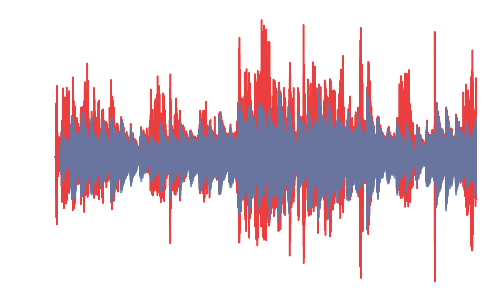

In [3]:
ax2 = plt.axes([-5, 2, 1, 1])
ax2.set_xlim(-1,500000)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
plt.rc('ytick', labelsize=15)

plt.plot(w1[:len(w1),0]+w2[:len(w1),0].ravel(), '#e50000', label='Speech', alpha=0.75) #plot speech
#plt.plot(w1[:len(w1),0].ravel(), '#4984b8', label='Speech', alpha=0.75)
#w = w1[:len(w1),0]+w2[:len(w1),0].ravel()

plt.plot(w2[:,0], '#4984b8', label='Music', alpha=0.8) #plot music 


#w = w1[:len(w1),0]+w2[:len(w1),0].ravel()
w = w1[:len(w1),0].ravel()
plt.axis('off')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
#ax2.axvline(linewidth=3, color='black') 
#save plot:
plt.savefig('/Users/maansidesai/Desktop/UT_Austin/Research/Fellowships/NDSEG/Figure/soundMix.png', bbox_inches='tight', dpi=300, frameon='false')

In [65]:
from IPython.display import Audio

#Audio(data=w1[:len(w1),0].ravel()+w2[:len(w1),0].ravel(), rate=fs1)
Audio(data=w1[:len(w1),0].ravel(), rate=fs1)
print(w)

[   0.    0.    0. ... 3231. 3551. 3565.]


In [66]:
%matplotlib inline
from matplotlib import pyplot as plt

In [67]:
#pspec, e=audio_preproc.spectools.powspec(w, sr=fs, wintime=0.025, steptime=0.010, dither=1)
pspec, e=audio_preproc.spectools.powspec(w, sr=fs1, wintime=0.025, steptime=0.010, dither=1)

In [68]:
pspec.shape

(1025, 1106)

In [69]:
pspec.shape

(1025, 1106)

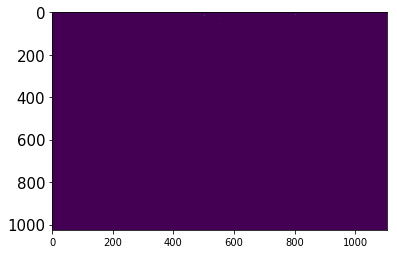

In [70]:
plt.imshow(pspec, aspect='auto')

In [71]:
aspectrum, wts, freqs = audio_preproc.spectools.audspec(pspec, sr=fs1, nfilts=200, fbtype='mel', minfreq=0, maxfreq=16000, sumpower=True, bwidth=1.0)

audio_preproc/fbtools.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[linpts] = f_0 + f_sp*z[linpts];
audio_preproc/fbtools.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[nonlinpts] = brkfrq*np.exp(np.log(logstep)*(z[nonlinpts]-brkpt));


In [72]:
aspectrum, wts, freqs = audio_preproc.spectools.audspec(pspec, sr=fs1, nfilts=200, fbtype='mel', minfreq=0, maxfreq=16000, sumpower=True, bwidth=1.0)

audio_preproc/fbtools.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[linpts] = f_0 + f_sp*z[linpts];
audio_preproc/fbtools.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[nonlinpts] = brkfrq*np.exp(np.log(logstep)*(z[nonlinpts]-brkpt));


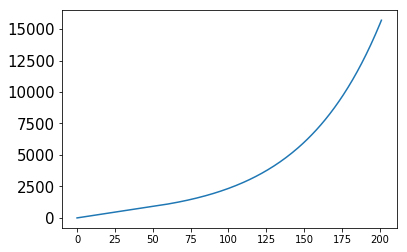

In [73]:
plt.plot(freqs)

In [74]:
aspectrum.shape
wts.shape
#plt.plot?

(200, 1025)

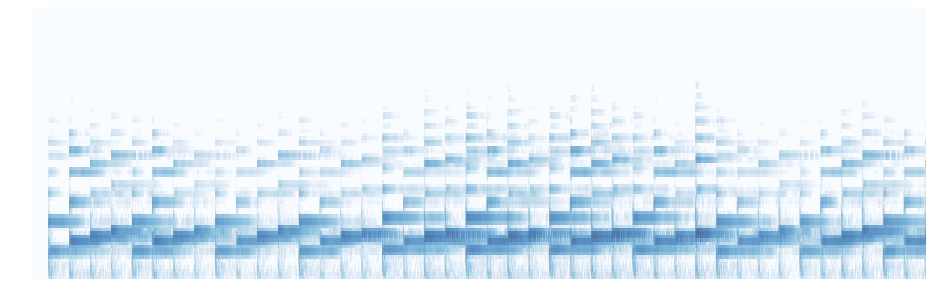

In [86]:


plt.figure(figsize=(16,5))
cm_list = [cm.Reds, cm.Blues]
op_list = [0.8,0.7]

plt.imshow(aspectrum**0.001, cmap=cm.Blues, aspect='auto', vmin=1.043, alpha=0.7)
plt.gca().invert_yaxis()
plt.axis('off')

#save plot:
plt.savefig('/Users/maansidesai/Desktop/UT_Austin/Research/Fellowships/NDSEG/Figure/music.png', bbox_inches='tight', dpi=300, frameon='false')

(488503, 2)
(488503, 2)


audio_preproc/fbtools.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[linpts] = f_0 + f_sp*z[linpts];
audio_preproc/fbtools.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[nonlinpts] = brkfrq*np.exp(np.log(logstep)*(z[nonlinpts]-brkpt));


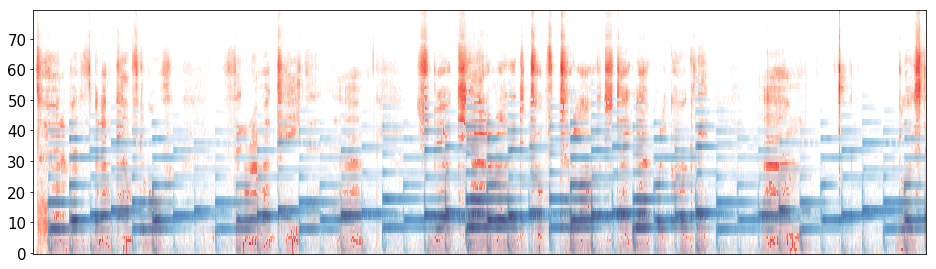

In [81]:
ax3 = plt.figure(figsize=(16,4.5))
cm_list = [cm.Reds, cm.Blues]
op_list = [0.8,0.7]

specgram_list = []
for wi, w in enumerate([w1, w2]):
    print(w.shape)
    pspec, e = audio_preproc.spectools.powspec(w[:,0], sr=fs1, wintime=0.025, steptime=0.01, dither=1)
    aspectrum, wts, freqs = audio_preproc.spectools.audspec(pspec, sr=fs1, nfilts=80, fbtype='mel', 
                                                            minfreq=0, maxfreq=16000, sumpower=True, bwidth=1.0)
    spectrogram_img = aspectrum**0.001
    specgram_list.append(spectrogram_img)
    spectrogram_img[spectrogram_img<1.043] = np.nan
    plt.imshow(spectrogram_img, cmap=cm_list[wi], aspect='auto', alpha=op_list[wi], vmin=1.043)


plt.gca().invert_yaxis()
ax3=plt.axis('on')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

#save plot:
#plt.savefig('/Users/maansidesai/Desktop/UT_Austin/Research/Fellowships/NDSEG/Figure/soundMix_spec.png', bbox_inches='tight', dpi=300, frameon='True')

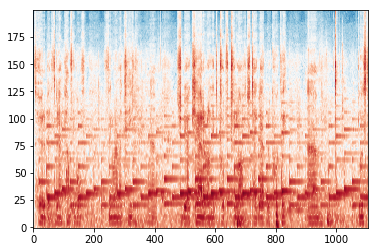

In [266]:
plt.imshow(aspectrum**0.001, cmap=cm.RdBu_r, aspect='auto')
plt.gca().invert_yaxis()

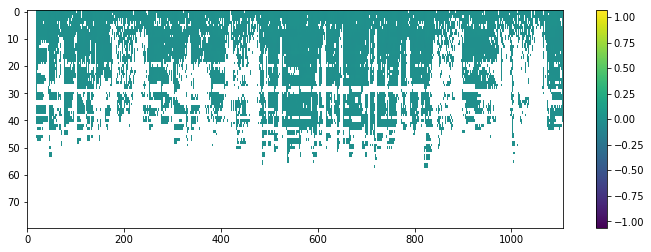

In [47]:
plt.figure(figsize=(12,4))
plt.imshow(-specgram_list[1] + specgram_list[0], aspect='auto', vmin=-1.065, vmax=1.065)
plt.colorbar()

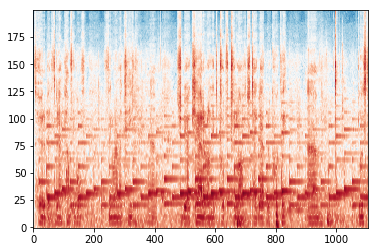

In [267]:
plt.imshow(aspectrum**0.001, cmap=cm.RdBu_r, aspect='auto')
plt.gca().invert_yaxis()

In [185]:
freqs

array([    0.        ,    18.2599078 ,    36.5198156 ,    54.7797234 ,
          73.03963119,    91.29953899,   109.55944679,   127.81935459,
         146.07926239,   164.33917019,   182.59907798,   200.85898578,
         219.11889358,   237.37880138,   255.63870918,   273.89861698,
         292.15852477,   310.41843257,   328.67834037,   346.93824817,
         365.19815597,   383.45806377,   401.71797157,   419.97787936,
         438.23778716,   456.49769496,   474.75760276,   493.01751056,
         511.27741836,   529.53732615,   547.79723395,   566.05714175,
         584.31704955,   602.57695735,   620.83686515,   639.09677294,
         657.35668074,   675.61658854,   693.87649634,   712.13640414,
         730.39631194,   748.65621974,   766.91612753,   785.17603533,
         803.43594313,   821.69585093,   839.95575873,   858.21566653,
         876.47557432,   894.73548212,   912.99538992,   931.25529772,
         949.51520552,   967.77511332,   986.03502112,  1004.43908362,
      

In [186]:
wts.shape

(200, 1025)

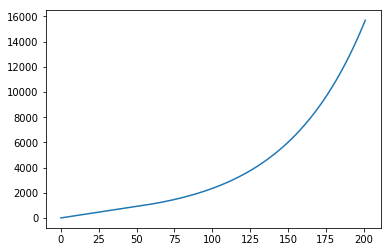

In [187]:
plt.plot(freqs)

In [188]:
frames[:10*rate,0] # Gives you the first 10 seconds of data (# samples = sec * samples/sec)
frames_speech[:10*speech_rate,0]

specgram(frames[:10*rate,0] + frames_speech[:10*speech_rate,0])


NameError: name 'frames' is not defined